<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis
</div>

In [34]:
# import library
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [36]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          2747 non-null   int64  
 1   quantity_ordered      2747 non-null   int64  
 2   price_per_unit        2747 non-null   float64
 3   orderline_number      2747 non-null   int64  
 4   sales                 2747 non-null   float64
 5   order_date            2747 non-null   object 
 6   days_since_lastorder  2747 non-null   int64  
 7   status                2747 non-null   object 
 8   productline           2747 non-null   object 
 9   retail_price          2747 non-null   int64  
 10  product_code          2747 non-null   object 
 11  customer_name         2747 non-null   object 
 12  phone                 2747 non-null   object 
 13  address               2747 non-null   object 
 14  city                  2747 non-null   object 
 15  postalcode            2747

### Q4: Does different in MSPR and price per unit affect the revenue?

Answer this question help:
- Nhà sản xuất có thể điều chỉnh chiến lược giá để tối ưu hóa doanh thu. Điều này có thể bao gồm xem xét giảm giá hoặc tăng giá trong các trường hợp cụ thể để đạt được hiệu suất kinh doanh tốt nhất
- Phân tích giá có thể giúp nhà sản xuất hiểu rõ mức độ nhạy cảm của khách hàng đối với sự chênh lệch giá. Có thể có các nhóm khách hàng có xu hướng phản ứng mạnh mẽ hơn hoặc yếu đối với sự biến động giá.

In [60]:
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

# Phân loại các khoảng chênh lệch giá và tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi bin
price_diff_bins = [processed_df["price_diff"].min(), -50, 0, 50, 100, processed_df["price_diff"].max()] 

processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=price_diff_bins)

# Tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi khoảng chênh lệch giá
price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


/tmp/ipykernel_152820/38224653.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


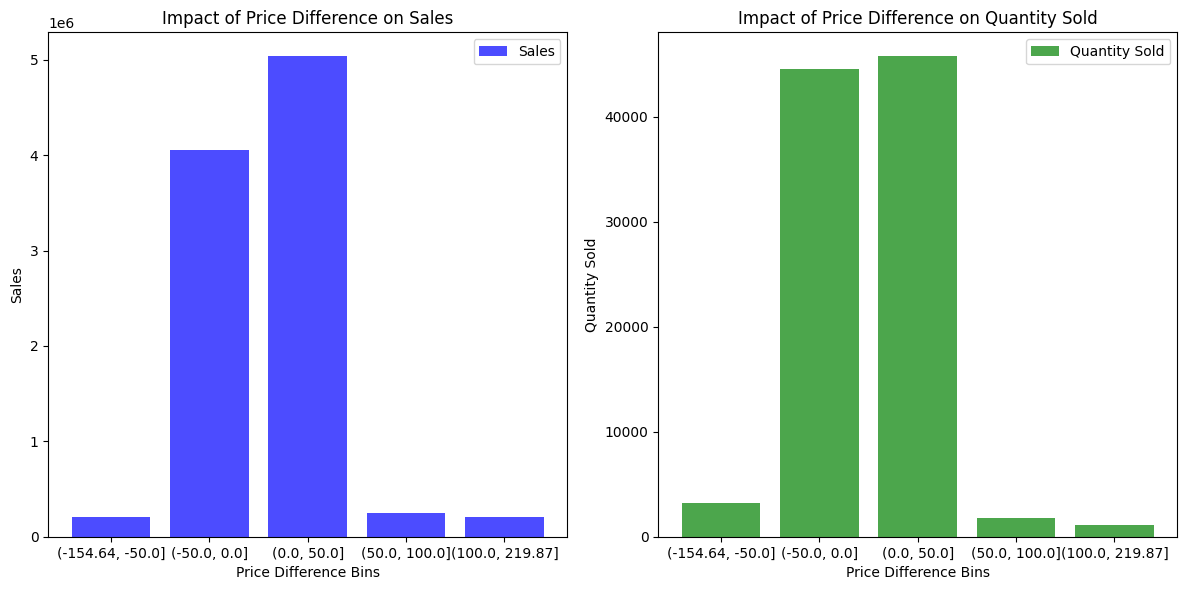

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['sales'], color='blue', alpha=0.7, label='Sales')
ax[0].set_xlabel('Price Difference Bins')
ax[0].set_ylabel('Sales')
ax[0].set_title('Impact of Price Difference on Sales')
ax[0].legend()

# Biểu đồ 2 - Quantity Sold
ax[1].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['quantity_ordered'], color='green', alpha=0.7, label='Quantity Sold')
ax[1].set_xlabel('Price Difference Bins')
ax[1].set_ylabel('Quantity Sold')
ax[1].set_title('Impact of Price Difference on Quantity Sold')
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Tính tương quan giữa chênh lệch giá và tỷ lệ doanh thu so với MSRP
correlation = processed_df['price_diff'].corr(processed_df['sales'] / processed_df['retail_price'])
print(f'Correlation between Price Difference and Sales-to-MSRP ratio: {correlation}')

# Kiểm tra sự chênh lệch giá có liên quan đến kích thước của giao dịch không
avg_price_diff_by_deal_size = processed_df.groupby('deal_size')['price_diff'].mean()

# In ra giá trung bình của chênh lệch giá cho từng kích thước của giao dịch
print(avg_price_diff_by_deal_size)

Correlation between Price Difference and Sales-to-MSRP ratio: 0.6747379972005295
deal_size
Large     22.336382
Medium     4.321868
Small     -6.506027
Name: price_diff, dtype: float64


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Đoạn mã tạo cột mới SELLING_PRICE_DIFF
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

num_bins = 3
bins = np.linspace(processed_df['retail_price'].min(), processed_df['retail_price'].max(), num_bins + 1)
bin_indices_retail = np.digitize(processed_df['retail_price'], bins)

# Áp dụng bin_indices vào cột 'price_diff'
processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=bins)

# Tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi khoảng chênh lệch giá
price_diff_stats = processed_df.groupby(['price_diff_bins', 'retail_price']).agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()

# In ra thông tin tổng hợp
print(price_diff_stats)

# Vẽ biểu đồ để hiển thị ảnh hưởng của chênh lệch giá đến số lượng sản phẩm bán ra
plt.figure(figsize=(10, 6))
for bin_index in set(bin_indices_retail):
    subset = processed_df[processed_df['retail_price_bin'] == bin_index]
    plt.bar(subset['price_diff_bins'].astype(str), subset['quantity_ordered'], alpha=0.7, label=f'Retail Price Bin {bin_index}')

plt.xlabel('Price Difference Bins')
plt.ylabel('Quantity Sold')
plt.title('Impact of Price Difference on Quantity Sold')
plt.legend()
plt.show()

      price_diff_bins  retail_price  quantity_ordered     sales
0      (33.0, 93.333]          33.0                77   5943.87
1      (33.0, 93.333]          35.0               111  11869.74
2      (33.0, 93.333]          37.0                 0      0.00
3      (33.0, 93.333]          40.0                69   7011.56
4      (33.0, 93.333]          41.0               106   9396.81
..                ...           ...               ...       ...
235  (153.667, 214.0]         173.0                 0      0.00
236  (153.667, 214.0]         193.0                 0      0.00
237  (153.667, 214.0]         194.0                 0      0.00
238  (153.667, 214.0]         207.0                 0      0.00
239  (153.667, 214.0]         214.0                 0      0.00

[240 rows x 4 columns]


/tmp/ipykernel_152820/2816312105.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_stats = processed_df.groupby(['price_diff_bins', 'retail_price']).agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


KeyError: 'retail_price_bin'

<Figure size 1000x600 with 0 Axes>

In [ ]:
processed_df["price_diff"].max()

219.87

/tmp/ipykernel_152820/1336710317.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_stats = processed_df.groupby(['price_diff_bins', 'retail_price']).agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


      price_diff_bins  retail_price  quantity_ordered     sales
0      (33.0, 93.333]          33.0                77   5943.87
1      (33.0, 93.333]          35.0               111  11869.74
2      (33.0, 93.333]          37.0                 0      0.00
3      (33.0, 93.333]          40.0                69   7011.56
4      (33.0, 93.333]          41.0               106   9396.81
..                ...           ...               ...       ...
235  (153.667, 214.0]         173.0                 0      0.00
236  (153.667, 214.0]         193.0                 0      0.00
237  (153.667, 214.0]         194.0                 0      0.00
238  (153.667, 214.0]         207.0                 0      0.00
239  (153.667, 214.0]         214.0                 0      0.00

[240 rows x 4 columns]


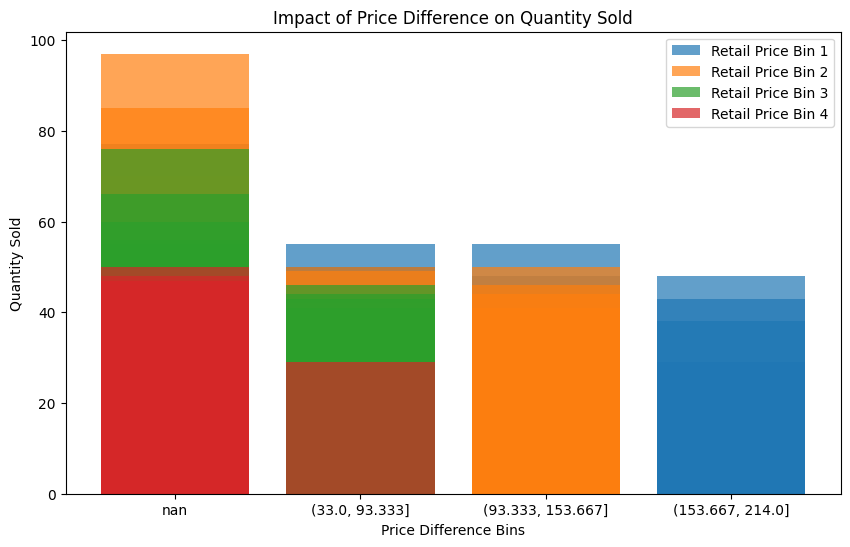

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'price_per_unit', 'retail_price', and 'quantity_ordered' are columns in DataFrame processed_df
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

# Chia bin cho cột 'retail_price'
num_bins = 3
bins = np.linspace(processed_df['retail_price'].min(), processed_df['retail_price'].max(), num_bins + 1)
bin_indices_retail = np.digitize(processed_df['retail_price'], bins)

# Áp dụng bin_indices vào cột 'price_diff'
processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=bins)

# Tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi khoảng chênh lệch giá
price_diff_stats = processed_df.groupby(['price_diff_bins', 'retail_price']).agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()

# In ra thông tin tổng hợp
print(price_diff_stats)

# Vẽ biểu đồ để hiển thị ảnh hưởng của chênh lệch giá đến số lượng sản phẩm bán ra
plt.figure(figsize=(10, 6))
for bin_index in set(bin_indices_retail):
    subset = processed_df[bin_indices_retail == bin_index]
    plt.bar(subset['price_diff_bins'].astype(str), subset['quantity_ordered'], alpha=0.7, label=f'Retail Price Bin {bin_index}')

plt.xlabel('Price Difference Bins')
plt.ylabel('Quantity Sold')
plt.title('Impact of Price Difference on Quantity Sold')
plt.legend()
plt.show()


/tmp/ipykernel_152820/682014353.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_stats = processed_df.groupby(['price_diff_bins', 'retail_price']).agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (1288,).

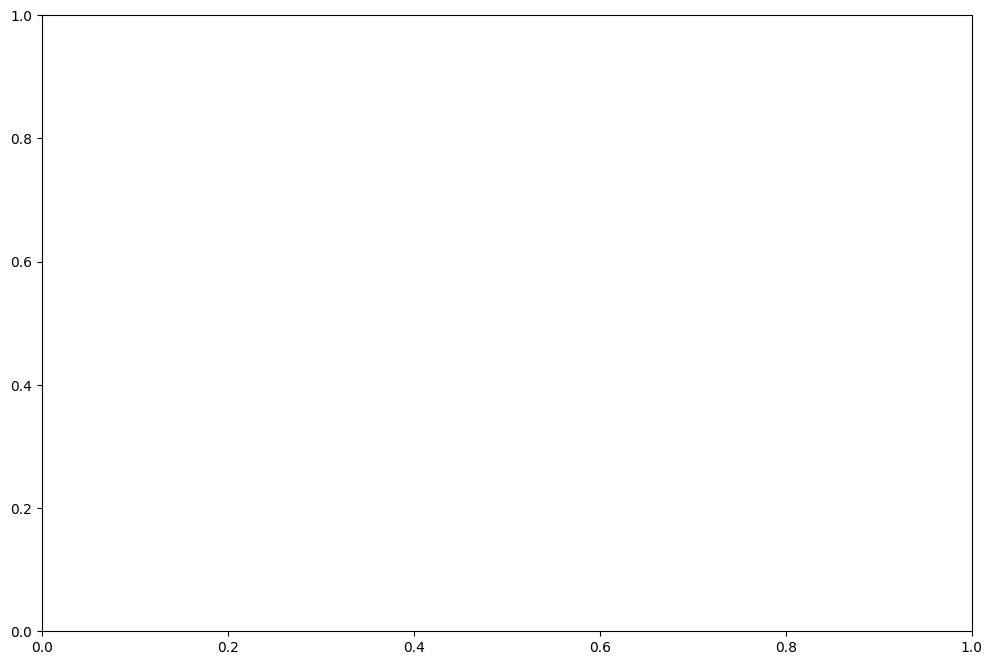

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'price_per_unit', 'retail_price', and 'quantity_ordered' are columns in DataFrame processed_df
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

# Chia bin cho cột 'retail_price'
num_bins = 3
bins = np.linspace(processed_df['retail_price'].min(), processed_df['retail_price'].max(), num_bins + 1)
bin_indices_retail = np.digitize(processed_df['retail_price'], bins)

# Áp dụng bin_indices vào cột 'price_diff'
processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=[processed_df["price_diff"].min(), -50, 0, 50, 100, processed_df["price_diff"].max()])

# Tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi khoảng chênh lệch giá
price_diff_stats = processed_df.groupby(['price_diff_bins', 'retail_price']).agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()

# Vẽ biểu đồ để hiển thị ảnh hưởng của chênh lệch giá đến số lượng sản phẩm bán ra
plt.figure(figsize=(12, 8))
bar_width = 0.35

for bin_index in set(bin_indices_retail):
    subset = processed_df[bin_indices_retail == bin_index]
    bar_positions = np.arange(len(set(subset['price_diff_bins'])))
    plt.bar(bar_positions + bar_width * bin_index, subset['quantity_ordered'], bar_width, alpha=0.7, label=f'Retail Price Bin {bin_index}')

plt.xlabel('Price Difference Bins')
plt.ylabel('Quantity Sold')
plt.title('Impact of Price Difference on Quantity Sold')
plt.xticks(np.arange(len(set(price_diff_stats['price_diff_bins']))) + bar_width * (len(set(bin_indices_retail)) - 1) / 2,
           set(price_diff_stats['price_diff_bins'].astype(str)))
plt.legend()
plt.show()
